## Linear Least Mean Squares Estimation - Scaling
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* We have 2000 observations $X$ of noisy signals, where the true signal $\Theta = X+W$. We will try to estimate $\hat \theta$ for a specific value of $x$ with the LMS and LLMS estimator.
* To emphasize the difference between LMS and LLMS, we will also look at the estimate from a scaled version of $X_{trans}=X^3$.

In [2]:
# transformation function
transform = lambda x: x**3

# number of observations
n = 2000

# observed data
X = np.random.randint(1, 11, n)
X_trans = transform(X)

# noise term
W = np.random.randint(0, 3, n)

# true signal
Theta = X + W

In [3]:
# actual observation
obs = 5
obs_trans = transform(obs)

The LMS estimator gets exactly the same result in both cases.

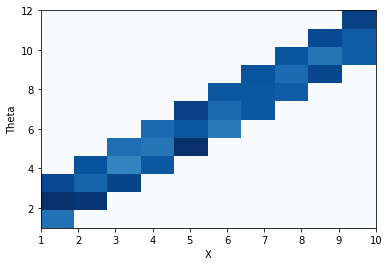

In [4]:
# visible linear relationship between X and Theta
plt.hist2d(x=X, y=Theta, cmap='Blues', bins=[10,12])
plt.xlabel('X')
plt.ylabel('Theta')
plt.show()

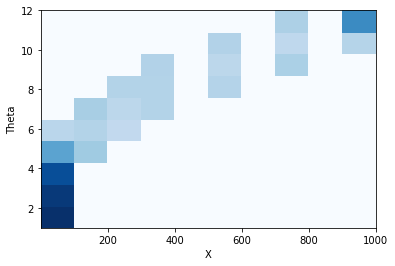

In [5]:
# Non-linear relationship between X cubed and Theta
plt.hist2d(x=X_trans, y=Theta, cmap='Blues')
plt.xlabel('X')
plt.ylabel('Theta')
plt.show()

The LLMS estimator clearly performs worse with $X_{trans}$ due to its non-linear relationship with $\Theta$ that makes it hard to fit a good line.

In [6]:
def llms(X, Theta, obs):
  'Linear least means squared estimation'
  
  exp = np.mean(X)
  var = np.var(X)
  cov = np.cov(X, Theta)[0][1]

  print('Exp. ', round(exp, 2))
  print('Var. ', round(var, 2))
  print('Covar. ', round(cov,2))

  return np.mean(Theta) + cov/var*(obs-exp)

In [7]:
# the LMS estimator is simply the conditional expectation
# both give the same estimate (since not bound to some linear relationship)
print('X ', np.mean(Theta[X==obs]))
print('X^3 ', np.mean(Theta[X_trans==obs_trans]))

X  5.9772727272727275
X^3  5.9772727272727275


In [8]:
# linear estimate from X
llms(X, Theta, obs)

Exp.  5.49
Var.  8.38
Covar.  8.42


5.9988562533805725

In [9]:
# linear estimate from X cubed
llms(X_trans, Theta, obs_trans)

Exp.  303.51
Var.  107727.57
Covar.  887.42


5.0200230735370655